# Learning and Decision Making

## Laboratory 4: Reinforcement learning

In the end of the lab, you should export the notebook to a Python script (File >> Download as >> Python (.py)). Your file should be named `padi-lab4-groupXX.py`, where the `XX` corresponds to your group number and should be submitted to the e-mail <adi.tecnico@gmail.com>. 

Make sure...

* **... that the subject is of the form `[<group n.>] LAB <lab n.>`.** 

* **... to strictly respect the specifications in each activity, in terms of the intended inputs, outputs and naming conventions.** 

In particular, after completing the activities you should be able to replicate the examples provided (although this, in itself, is no guarantee that the activities are correctly completed).

### 1. The MDP Model 

In this lab you will implement several reinforcement learning algorithms, and use the "Pacman" domain, from Lab 2, to test and compare these algorithms. Don't forget, however, that your functions should work for **any MDP** and not just the one provided. 

The "Pacman" domain to be used is represented in the diagram below.

<img src="pacman-big.png">

In the Pacman domain above,

* The ghost moves randomly between cells 1-3.
* The player controls the movement of Pacman through four actions: `Up`, `Down`, `Left`, and `Right`. 
* Each action moves the Pacman character one step in the corresponding direction, if an adjacent cell exists in that direction. Otherwise, Pacman remains in the same place.
* The cell in the bottom left corner (cell `29`) is adjacent, to the left, to the cell in the bottom right corner (cell `35`). In other words, if Pacman "moves left" in cell `29` it will end up in cell `35` and vice-versa.
* If Pacman lies in the same cell as the ghost (in either cell `1`, `2`, or `3`), the player loses the game. However, if Pacman "eats" the blue pellet (in cell `24`), it gains the ability to "eat" the ghost. In this case, if Pacman lies in the same cell as the ghost, it "eats" the ghost and wins the game. Assume that Pacman can never be in cell `24` without "eating" the pellet.

**Throughout the lab, unless if stated otherwise, use $\gamma=0.9$.**

$$\diamond$$

We start by loading the MDP for the "Pacman" domain from the file `pacman.npz`. We will use this domain as an example to illustrate the different functions/algorithms you are expected to deploy. The file contains both the MDP, described as a tuple like those from Lab 2, and the corresponding optimal $Q$-function.

To do so, you can run the code
```python
import numpy as np

mdp_info = np.load('pacman.npz', allow_pickle=True)

# The MDP is a tuple (X, A, P, c, gamma)
M = mdp_info['M']

# We also load the optimal Q-function for the MDP
Qopt = mdp_info['Q']
```

---

In the first activity, you will implement a "simulator of the world". The simulator consists of a function that enables you to sample a transition from a given MDP. You will then use this function, in subsequent activities, to generate the data that your agent will use to learn.

---

#### Activity 1.        

Write a function named `sample_transition` that receives, as input, a tuple representing an arbitrary MDP as well as two integers, `s` and `a`, corresponding to a state and an action. The function should return a tuple `(s, a, c, s')`, where `c` is the cost associated with performing action `a` in state `s` and `s'` is a state generated from `s` upon selecting action `a`, according to the transition probabilities for the MDP.

---

In [1]:
import numpy as np

mdp_info = np.load('pacman.npz', allow_pickle=True)

# The MDP is a tuple (X, A, P, c, gamma)
M = mdp_info['M']

# We also load the optimal Q-function for the MDP
Qopt = mdp_info['Q']

def sample_transition(M, s, a): #Randomly gets next_state (based on current and transition prob.)#

    states = np.arange(len(M[0]))

    new_state = np.random.choice(states, p = M[2][a][s])

    cost = M[3][s][a]

    return (s, a, cost, new_state)

import numpy.random as rnd

rnd.seed(42)

# Select random state and action
s = 106 # State (18, 0, 2)
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('Observed transition:\n(', end='')
print(M[0][s], end=', ')
print(M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

# Select random state and action
s = 12 # State (3, S, 1)
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('\nObserved transition:\n(', end='')
print(M[0][s], end=', ')
print(M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

# Select random state and action
s = 164 # State (28, 0, 3)
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('\nObserved transition:\n(', end='')
print(M[0][s], end=', ')
print(M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

Observed transition:
((18, 0, 2), Left, 0.1, (17, 0, 3))

Observed transition:
((3, S, 1), Left, 0.1, (2, S, 2))

Observed transition:
((28, 0, 3), Up, 0.1, (24, S, 2))


All reinforcement learning algorithms that you will implement can only access the MDP through the function `sample_transition` which, in a sense, simulates an "interaction" of the agent with the environment.

For example, using the "Pacman" MDP, you could run:

```python
import numpy.random as rnd

rnd.seed(42)

# Select random state and action
s = 106 # State (18, 0, 2)
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('Observed transition:\n(', end='')
print(M[0][s], end=', ')
print(M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

# Select random state and action
s = 12 # State (3, S, 1)
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('\nObserved transition:\n(', end='')
print(M[0][s], end=', ')
print(M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

# Select random state and action
s = 164 # State (28, 0, 3)
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('\nObserved transition:\n(', end='')
print(M[0][s], end=', ')
print(M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')
```

and get, as output:

```
Observed transition:
((18, 0, 2), Left, 0.1, (17, 0, 3))

Observed transition:
((3, S, 1), Left, 0.1, (2, S, 2))

Observed transition:
((28, 0, 3), Up, 0.1, (24, S, 2))
```

---

#### Activity 2.        

Write down a function named `egreedy` that implements an $\epsilon$-greedy policy. Your function should receive, as input, a `numpy` array `Q` with shape `(N,)`, for some integer `N`, and, as an optional argument, a floating point number `eps` with a default value `eps=0.1`. Your function should return... 

* ... with a probability $\epsilon$, a random index between $0$ and $N-1$.
* ... with a probability $1-\epsilon$, the index between $0$ and $N-1$ corresponding to the minimum value of `Q`. If more than one such index exists, the function should select among such indices **uniformly at random**.

**Note:** In the upcoming activities, the array `Q` received by the function `egreedy` will correspond to a row of a $Q$-function, and `N` will correspond to the number of actions.

In [2]:
def egreedy(Q, eps = 0.1):
    
    N = len(Q)
    
    l = np.arange(N)
    
    prob = eps
    
    test = np.array([eps,1-eps])
    
    choice_list = [0,1]
    
    choice = np.random.choice(choice_list, p = test)
    
    if choice == 0:
        
        return np.random.choice(l)
        
    else:   
        Qmin = np.min(Q)
        
        indexes = np.where(Q == Qmin)
        
        index_list = []
        
        for index in indexes:
            index_list.append(index[0])
            
        return np.random.choice(index_list)
    
rnd.seed(42)

s = 106 # State (18, 0, 2)
a = egreedy(Qopt[s, :], eps=0)
print('State:', M[0][s], '- action (eps=0.0):', M[1][a])
a = egreedy(Qopt[s, :], eps=0.5)
print('State:', M[0][s], '- action (eps=0.5):', M[1][a])
a = egreedy(Qopt[s, :], eps=1.0)
print('State:', M[0][s], '- action (eps=1.0):', M[1][a])

s = 12 # State (3, S, 1)
a = egreedy(Qopt[s, :], eps=0)
print('\nState:', M[0][s], '- action (eps=0.0):', M[1][a])
a = egreedy(Qopt[s, :], eps=0.5)
print('State:', M[0][s], '- action (eps=0.5):', M[1][a])
a = egreedy(Qopt[s, :], eps=1.0)
print('State:', M[0][s], '- action (eps=1.0):', M[1][a])

s = 164 # State (28, 0, 3)
a = egreedy(Qopt[s, :], eps=0)
print('\nState:', M[0][s], '- action (eps=0.0):', M[1][a])
a = egreedy(Qopt[s, :], eps=0.5)
print('State:', M[0][s], '- action (eps=0.5):', M[1][a])
a = egreedy(Qopt[s, :], eps=1.0)
print('State:', M[0][s], '- action (eps=1.0):', M[1][a])

State: (18, 0, 2) - action (eps=0.0): Right
State: (18, 0, 2) - action (eps=0.5): Right
State: (18, 0, 2) - action (eps=1.0): Up

State: (3, S, 1) - action (eps=0.0): Left
State: (3, S, 1) - action (eps=0.5): Left
State: (3, S, 1) - action (eps=1.0): Right

State: (28, 0, 3) - action (eps=0.0): Up
State: (28, 0, 3) - action (eps=0.5): Left
State: (28, 0, 3) - action (eps=1.0): Down


For example, using the function `Qopt` loaded from the "Pacman" file, you can run:

```python
rnd.seed(42)

s = 106 # State (18, 0, 2)
a = egreedy(Qopt[s, :], eps=0)
print('State:', M[0][s], '- action (eps=0.0):', M[1][a])
a = egreedy(Qopt[s, :], eps=0.5)
print('State:', M[0][s], '- action (eps=0.5):', M[1][a])
a = egreedy(Qopt[s, :], eps=1.0)
print('State:', M[0][s], '- action (eps=1.0):', M[1][a])

s = 12 # State (3, S, 1)
a = egreedy(Qopt[s, :], eps=0)
print('\nState:', M[0][s], '- action (eps=0.0):', M[1][a])
a = egreedy(Qopt[s, :], eps=0.5)
print('State:', M[0][s], '- action (eps=0.5):', M[1][a])
a = egreedy(Qopt[s, :], eps=1.0)
print('State:', M[0][s], '- action (eps=1.0):', M[1][a])

s = 164 # State (28, 0, 3)
a = egreedy(Qopt[s, :], eps=0)
print('\nState:', M[0][s], '- action (eps=0.0):', M[1][a])
a = egreedy(Qopt[s, :], eps=0.5)
print('State:', M[0][s], '- action (eps=0.5):', M[1][a])
a = egreedy(Qopt[s, :], eps=1.0)
print('State:', M[0][s], '- action (eps=1.0):', M[1][a])
```

you will get the output

```
State: (18, 0, 2) - action (eps=0.0): Right
State: (18, 0, 2) - action (eps=0.5): Right
State: (18, 0, 2) - action (eps=1.0): Left

State: (3, S, 1) - action (eps=0.0): Left
State: (3, S, 1) - action (eps=0.5): Right
State: (3, S, 1) - action (eps=1.0): Down

State: (28, 0, 3) - action (eps=0.0): Up
State: (28, 0, 3) - action (eps=0.5): Up
State: (28, 0, 3) - action (eps=1.0): Up
```

Note that, depending on the order and number of calls to functions in the random library you may get slightly different results.

---

#### Activity 3. 

Write a function `mb_learning` that implements the model-based reinforcement learning algorithm discussed in class. Your function should receive as input arguments 

* A tuple, `mdp`, containing the description of an **arbitrary** MDP. The structure of the tuple is similar to that provided in the example above. 
* An integer, `n`, corresponding the number of steps that your algorithm should run.
*  A numpy array `qinit` with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`. The matrix `qinit` should be used to initialize the $Q$-function being learned by your function.
* A tuple, `Pinit`, with as many elements as the number of actions in `mdp`. Each element of `Pinit` corresponds to square numpy arrays with as many rows/columns as the number of states in `mdp` and can be **any** transition probability matrix. The matrices in `Pinit` should be used to initialize the transition probability matrices of the model being learned by your function.
* A numpy array `cinit` with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`. The matrix `cinit` should be used to initialize the cost function of the model being learned by your function.

Your function should simulate an interaction of `n` steps between the agent and the environment, during which it should perform `n` iterations of the model-based RL algorithm seen in class. In particular, it should learn the transition probabilities and cost function from the interaction between the agent and the environment, and use these to compute the optimal $Q$-function. The transition probabilities, cost and $Q$-functions to be learned should be initialized using `Pinit`, `cinit` and `qinit`, respectively. 

Note that, at each step of the interaction,

* The agent should observe the current state, and select an action using an $\epsilon$-greedy policy with respect to its current estimate of the optimal $Q$-values. You should use the function `egreedy` from Activity 2, with $\epsilon=0.15$. 
* Given the state and action, you must then compute the cost and generate the next state, using `mdp` and the function `sample_transition` from Activity 1.
* With this transition information (state, action, cost, next-state), you can now perform an update to the transition probabilities, cost function, and $Q$-function.
* When updating the components $(x,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(x,a)+1},$$

where $N_t(x,a)$ is the number of visits to the pair $(x,a)$ up to time step $t$.

Your function should return a tuple containing:

*  A numpy array with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`, corresponding to the learned $Q$-function.
* A tuple with as many elements as the number of actions in `mdp`. The element $a$ of the tuple corresponds to a square numpy array with as many rows/columns as the number of states in `mdp`, corresponding to the learned transition probabilities for action $a$.
* A numpy array with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`, corresponding to the learned cost function.

---

In [3]:
def mb_learning(mdp, n, qinit, Pinit, cinit):
    
    X = np.arange(len(mdp[0]))
    
    Q_hat = qinit
    
    Nt = np.zeros(Q_hat.shape)
    P_hat = Pinit
    c_hat = cinit
    
    x = np.random.choice(X)
    
    gamma = mdp[-1]
    
    for i in range(n):
        
        a = egreedy(Q_hat[x,:], eps = 0.15)
        
        tau = sample_transition(mdp, x, a)

        c = tau[2]
        x_next = tau[3]
            
        Nt[x, a] += 1
            
        step = 1/(Nt[x, a] + 1)
            
        for y in X:
            P_hat[a][x, y] += step*(int(x_next == y) - P_hat[a][x, y])
                
        c_hat[x, a] += step*(c - c_hat[x, a])
        
        Qmin = np.reshape(np.min(Q_hat, axis = 1), [len(X),1])
        Pa = np.reshape(P_hat[a][x,:], [1, len(X)])
        
        Q_hat[x,a] = c_hat[x,a] + gamma * np.matmul(Pa,Qmin)
        
        x = x_next
        
    return (Q_hat, P_hat, c_hat)

rnd.seed(42)

# Initialize transition probabilities
pinit = ()

for a in range(len(M[1])):
    pinit += (np.eye(len(M[0])),)

# Initialize cost function
cinit = np.zeros((len(M[0]), len(M[1])))

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew, pnew, cnew = mb_learning(M, 1000, qinit, pinit, cinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Qopt))

# Run 1000 additional steps of model-based learning
qnew, pnew, cnew = mb_learning(M, 1000, qnew, pnew, cnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Qopt))

Error in Q after 1000 steps: 19.958286761693206
Error in Q after 2000 steps: 19.930450276033667


As an example using the "Pacman" MDP, we could run:

```python
rnd.seed(42)

# Initialize transition probabilities
pinit = ()

for a in range(len(M[1])):
    pinit += (np.eye(len(M[0])),)

# Initialize cost function
cinit = np.zeros((len(M[0]), len(M[1])))

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew, pnew, cnew = mb_learning(M, 1000, qinit, pinit, cinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Qopt))

# Run 1000 additional steps of model-based learning
qnew, pnew, cnew = mb_learning(M, 1000, qnew, pnew, cnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Qopt))
```

to get

```
Error in Q after 1000 steps: 19.916238521031588
Error in Q after 2000 steps: 19.86435667980359
```

Note that, even if the seed is fixed, the numerical values may differ somewhat from those above.

### 3. Model-free learning

You will now implement both $Q$-learning and SARSA.

---

#### Activity 4. 

Write a function `qlearning` that implements the $Q$-learning algorithm discussed in class. Your function should receive as input arguments 

* A tuple, `mdp`, containing the description of an **arbitrary** MDP. The structure of the tuple is similar to that provided in the examples above. 
* An integer, `n`, corresponding he number of steps that your algorithm should run.
*  A `numpy` array `qinit` with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`. The matrix `qinit` should be used to initialize the $Q$-function being learned by your function.

Your function should simulate an interaction of `n` steps between the agent and the environment, during which it should perform `n` iterations of the $Q$-learning algorithm seen in class. In particular, it should learn optimal $Q$-function. The $Q$-function to be learned should be initialized using `qinit`. 

Note that, at each step of the interaction,

* The agent should observe the current state, and select an action using an $\epsilon$-greedy policy with respect to its current estimate of the optimal $Q$-values. You should use the function `egreedy` from Activity 2, with $\epsilon=0.15$. 
* Given the state and action, you must then compute the cost and generate the next state, using `mdp` and the function `sample_transition` from Activity 1.
* With this transition information (state, action, cost, next-state), you can now perform an update to the $Q$-function.
* When updating the components $(x,a)$ of the model, use the step-size $\alpha=0.3$.

Your function should return a `numpy` array with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`, corresponding to the learned $Q$-function.

---

In [4]:
def qlearning(mdp, n, qinit):
    
    X = np.arange(len(mdp[0]))

    x = np.random.choice(X)

    Q = qinit
    
    alpha = 0.3
    
    gamma = mdp[-1]
    
    for i in range(n):

        a = egreedy(Q[x,:], eps = 0.15)
    
        tau = sample_transition(mdp, x, a)
                
        c = tau[2]
        
        x_next = tau[3]

        min_a = np.min(Q[x_next,:])
        
        delta = c + min_a*gamma - Q[x,a]
        
        Q[x][a] += alpha*delta
        
        x = x_next

    return Q

rnd.seed(42)

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew = qlearning(M, 1000, qinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Qopt))

# Run 1000 additional steps of model-based learning
qnew = qlearning(M, 1000, qnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Qopt))

Error in Q after 1000 steps: 19.969961349711678
Error in Q after 2000 steps: 19.952524658573367


As an example using the "Pacman" MDP, we could run:

```python
rnd.seed(42)

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew = qlearning(M, 1000, qinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Qopt))

# Run 1000 additional steps of model-based learning
qnew = qlearning(M, 1000, qnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Qopt))
```

to get

```
Error in Q after 1000 steps: 19.944334092242844
Error in Q after 2000 steps: 19.91105731381223
```

Once again, even if the seed is fixed, the numerical values may differ somewhat from those above.

---

#### Activity 5. 

Write a function `sarsa` that implements the SARSA algorithm discussed in class. Your function should receive as input arguments 

* A tuple, `mdp`, containing the description of an **arbitrary** MDP. The structure of the tuple is similar to that provided in the examples above. 
* An integer, `n`, corresponding he number of steps that your algorithm should run.
*  A `numpy` array `qinit` with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`. The matrix `qinit` should be used to initialize the $Q$-function being learned by your function.

Your function should simulate an interaction of `n` steps between the agent and the environment, during which it should perform `n` iterations of the SARSA algorithm seen in class. The $Q$-function to be learned should be initialized using `qinit`. 

Note that, at each step of the interaction,

* The agent should observe the current state, and select an action using an $\epsilon$-greedy policy with respect to its current estimate of the optimal $Q$-values. You should use the function `egreedy` from Activity 2, with $\epsilon=0.15$. **Do not adjust the value of $\epsilon$ during learning.**
* Given the state and action, you must then compute the cost and generate the next state, using `mdp` and the function `sample_transition` from Activity 1.
* With this transition information (state, action, cost, next-state), you can now perform an update to the $Q$-function.
* When updating the components $(x,a)$ of the model, use the step-size $\alpha=0.3$.

Your function should return a `numpy` array with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`, corresponding to the learned $Q$-function.

---

In [5]:
def sarsa(mdp, n, qinit):
    
    X = np.arange(len(M[0]))

    x = np.random.choice(X) #start state, random

    Q = qinit
    
    alpha = 0.3
    
    gamma = M[-1]
    
    a = egreedy(Q[x,:], eps = 0.15)
    
    for i in range(0,n):

        tau = sample_transition(M, x, a)
        
        c = tau[2]
        
        x_next = tau[3]
        
        a_next = egreedy(Q[x_next,:], eps = 0.15)

        delta = c + gamma* Q[x_next, a_next] - Q[x,a]

        Q[x,a] += alpha*delta
        
        a = a_next
        
        x = x_next
            
    return Q
        
rnd.seed(42)

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew = sarsa(M, 1000, qinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Qopt))

# Run 1000 additional steps of model-based learning
qnew = sarsa(M, 1000, qnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Qopt))

Error in Q after 1000 steps: 19.969961349711678
Error in Q after 2000 steps: 19.89095239623682


As an example using the "Pacman" MDP, we could run:

```python
rnd.seed(42)

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew = sarsa(M, 1000, qinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Qopt))

# Run 1000 additional steps of model-based learning
qnew = sarsa(M, 1000, qnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Qopt))
```

to get

```
Error in Q after 1000 steps: 19.944134856701385
Error in Q after 2000 steps: 19.91302892958602
```

You can also run the following code, to compare the performance of the three methods.

```python
%matplotlib inline

import matplotlib.pyplot as plt
from tqdm import trange

STEPS = 10
ITERS = 1000
RUNS  = 10

iters = range(0, STEPS * ITERS + 1, STEPS)

# Error matrices
Emb = np.zeros(ITERS + 1)
Eql = np.zeros(ITERS + 1)
Ess = np.zeros(ITERS + 1)

Emb[0] = np.linalg.norm(Qopt) * RUNS
Eql[0] = Emb[0]
Ess[0] = Emb[0]

rnd.seed(42)

for n in trange(RUNS):

    # Initialization
    pmb = ()
    for a in range(len(M[1])):
        pmb += (np.eye(len(M[0])),)
    cmb = np.zeros((len(M[0]), len(M[1])))
    qmb = np.zeros((len(M[0]), len(M[1])))

    qql = np.zeros((len(M[0]), len(M[1])))

    qss = np.zeros((len(M[0]), len(M[1])))

    # Run evaluation
    for t in range(ITERS):
        qmb, pmb, cmb = mb_learning(M, STEPS, qmb, pmb, cmb)
        Emb[t + 1] += np.linalg.norm(Qopt - qmb)

        qql = qlearning(M, STEPS, qql)
        Eql[t + 1] += np.linalg.norm(Qopt - qql)

        qss = sarsa(M, STEPS, qss)
        Ess[t + 1] += np.linalg.norm(Qopt - qss)
        
Emb /= RUNS
Eql /= RUNS
Ess /= RUNS

plt.figure()
plt.plot(iters, Emb, label='Model based learning')
plt.plot(iters, Eql, label='Q-learning')
plt.plot(iters, Ess, label='SARSA')
plt.legend()
plt.xlabel('N. iterations')
plt.ylabel('Error in $Q$-function')
```

As the output, you should observe a plot similar to the one below.

<img src="plot.png" align="left">

100%|███████████████████████████████████████████| 10/10 [01:00<00:00,  6.06s/it]


Text(0, 0.5, 'Error in $Q$-function')

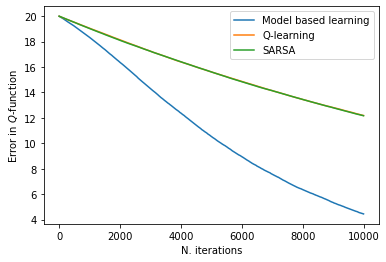

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
from tqdm import trange

STEPS = 10
ITERS = 1000
RUNS  = 10

iters = range(0, STEPS * ITERS + 1, STEPS)

# Error matrices
Emb = np.zeros(ITERS + 1)
Eql = np.zeros(ITERS + 1)
Ess = np.zeros(ITERS + 1)

Emb[0] = np.linalg.norm(Qopt) * RUNS
Eql[0] = Emb[0]
Ess[0] = Emb[0]

rnd.seed(42)

for n in trange(RUNS):

    # Initialization
    pmb = ()
    for a in range(len(M[1])):
        pmb += (np.eye(len(M[0])),)
    cmb = np.zeros((len(M[0]), len(M[1])))
    qmb = np.zeros((len(M[0]), len(M[1])))

    qql = np.zeros((len(M[0]), len(M[1])))

    qss = np.zeros((len(M[0]), len(M[1])))

    # Run evaluation
    for t in range(ITERS):
        qmb, pmb, cmb = mb_learning(M, STEPS, qmb, pmb, cmb)
        Emb[t + 1] += np.linalg.norm(Qopt - qmb)

        qql = qlearning(M, STEPS, qql)
        Eql[t + 1] += np.linalg.norm(Qopt - qql)

        qss = sarsa(M, STEPS, qss)
        Ess[t + 1] += np.linalg.norm(Qopt - qss)
        
Emb /= RUNS
Eql /= RUNS
Ess /= RUNS

plt.figure()
plt.plot(iters, Emb, label='Model based learning')
plt.plot(iters, Eql, label='Q-learning')
plt.plot(iters, Ess, label='SARSA')
plt.legend()
plt.xlabel('N. iterations')
plt.ylabel('Error in $Q$-function')

---

#### Activity 6.

**Based on the results you obtained when running the above code with your algorithms**, discuss the differences observed between the performance of the three methods.

---

According to the graph, model based learning achieves a quicker convergence to Q-optimal and SARSA and Q-Learning have identical performance.

Although SARSA and Q-Learning have the same error for this number of iterations, then, of these two, the only algorithm with guarantee of convergence to Q-optimal is Q-Learning. SARSA only has guarantee of convergence to Q-optimal if the value epsilon used in the epsilon greedy policy decays adequately. In this case, epsilon is constant, therefore, SARSA is not guaranteed to converge to Q-optimal.